# Librerías necesarias

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Problema:
*****
La clasificación de eventos es una de las tareas más frecuentes y fundamental en el área física de partículas de altas energías.

Un evento corresponde a una colisión de protones generado en un colisionador de partículas, como el Large Hadron Collider (LHC), y es representado por un conjunto de propiedades físicas medidas por los detectores del colisionandor.



# 2. Datos
*****

- Los datos originales son obtenidos desde este [link](https://www.openml.org/d/23512).

- y el paper que describe el fenómeno físico de la generación del Higgs es *Baldi, P., P. Sadowski, and D. Whiteson. Searching for Exotic Particles in High-energy Physics with Deep Learning. Nature Communications 5 (July 2, 2014)* y está en este [link](https://www.nature.com/articles/ncomms5308).

- Para efectos de este ejemplo, se generó una versión reducida de datos, que también incluyen atributos faltanes, y corresponde al archivo [higgs_reduced.csv]().

## 2.1 Cargando CSV

In [3]:
df = pd.read_csv("../data/higgs_reduced.csv")


In [4]:
df.shape

(9805, 30)

In [5]:
df.head()

,Unnamed: 0,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0,1.0,0.978916,1.844643,-1.422353,0.910926,1.741381,0.836740,1.038726,0.040076,...,0.509227,1.487003,0.000000,0.815551,1.017818,0.981035,1.173383,0.978406,0.987195,0.843390
1,1,0.0,0.785475,0.947617,1.601191,1.730936,-1.300155,0.898392,0.655507,1.034625,...,-0.129548,-0.258853,0.000000,1.666249,1.403631,0.986471,1.152768,1.342005,1.134370,1.092319
2,2,1.0,0.572818,-1.231151,-1.497259,0.557409,1.587439,2.817746,0.714921,-0.137981,...,-0.510981,1.181246,3.101961,2.894233,1.823246,0.998267,1.867427,2.785220,2.321026,1.750416
3,3,0.0,0.548844,2.153391,-0.562318,1.489274,0.248050,1.791746,-0.108951,1.369468,...,-0.621747,1.301107,3.101961,0.934149,0.871509,0.985588,0.821194,1.113907,1.328275,1.810306
4,4,1.0,0.846600,-0.158811,-1.235365,0.728787,-0.783034,1.155717,-0.462463,-0.844258,...,-1.235538,1.066934,0.000000,0.440971,0.965494,0.985530,1.133286,1.747692,0.984962,0.814022


In [6]:
df.columns

Index(['Unnamed: 0', 'class', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet1pt', 'jet1eta',
       'jet1phi', 'jet1b-tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag',
       'jet3pt', 'jet3eta', 'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta',
       'jet4phi', 'jet4b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb',
       'm_wbb', 'm_wwbb'],
      dtype='object')

- Eliminación de columna inncesaria

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9805 entries, 0 to 9804
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     9765 non-null   float64
 1   lepton_pT                 9758 non-null   float64
 2   lepton_eta                9760 non-null   float64
 3   lepton_phi                9751 non-null   float64
 4   missing_energy_magnitude  9754 non-null   float64
 5   missing_energy_phi        9764 non-null   float64
 6   jet1pt                    9759 non-null   float64
 7   jet1eta                   9759 non-null   float64
 8   jet1phi                   9746 non-null   float64
 9   jet1b-tag                 9763 non-null   float64
 10  jet2pt                    9753 non-null   float64
 11  jet2eta                   9758 non-null   float64
 12  jet2phi                   9761 non-null   float64
 13  jet2b-tag                 9746 non-null   float64
 14  jet3pt  

In [9]:
df.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.978916,1.844643,-1.422353,0.910926,1.741381,0.836740,1.038726,0.040076,2.173076,...,0.509227,1.487003,0.000000,0.815551,1.017818,0.981035,1.173383,0.978406,0.987195,0.843390
1,0.0,0.785475,0.947617,1.601191,1.730936,-1.300155,0.898392,0.655507,1.034625,2.173076,...,-0.129548,-0.258853,0.000000,1.666249,1.403631,0.986471,1.152768,1.342005,1.134370,1.092319
2,1.0,0.572818,-1.231151,-1.497259,0.557409,1.587439,2.817746,0.714921,-0.137981,1.086538,...,-0.510981,1.181246,3.101961,2.894233,1.823246,0.998267,1.867427,2.785220,2.321026,1.750416
3,0.0,0.548844,2.153391,-0.562318,1.489274,0.248050,1.791746,-0.108951,1.369468,0.000000,...,-0.621747,1.301107,3.101961,0.934149,0.871509,0.985588,0.821194,1.113907,1.328275,1.810306
4,1.0,0.846600,-0.158811,-1.235365,0.728787,-0.783034,1.155717,-0.462463,-0.844258,1.086538,...,-1.235538,1.066934,0.000000,0.440971,0.965494,0.985530,1.133286,1.747692,0.984962,0.814022


### Tipos de datos
*****

In [10]:
df.dtypes

class                       float64
lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet1pt                      float64
jet1eta                     float64
jet1phi                     float64
jet1b-tag                   float64
jet2pt                      float64
jet2eta                     float64
jet2phi                     float64
jet2b-tag                   float64
jet3pt                      float64
jet3eta                     float64
jet3phi                     float64
jet3b-tag                   float64
jet4pt                      float64
jet4eta                     float64
jet4phi                     float64
jet4b-tag                   float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

- Estadísticas generales de cada variable de los datos

In [11]:
df.describe()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,9765.000000,9758.000000,9760.000000,9751.000000,9754.000000,9764.000000,9759.000000,9759.000000,9746.000000,9763.000000,...,9762.000000,9745.000000,9753.000000,9745.000000,9757.000000,9754.000000,9762.000000,9759.000000,9744.000000,9749.000000
mean,0.532616,0.991684,-0.003776,-0.012523,0.996464,-0.029648,0.987577,-0.002825,-0.001211,0.997060,...,-0.032456,-0.003429,0.999478,1.045429,1.028960,1.051582,1.012399,0.978600,1.037812,0.963750
std,0.498961,0.577476,1.008956,1.006511,0.594506,1.002862,0.479192,1.011756,1.009457,1.027607,...,1.009998,1.002836,1.398682,0.691135,0.387732,0.167405,0.403176,0.525095,0.363967,0.319643
min,0.000000,0.274697,-2.419393,-1.742508,0.010021,-1.743944,0.202177,-2.952891,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.152761,0.310499,0.262575,0.370879,0.073968,0.371314,0.419189
25%,0.000000,0.581100,-0.742218,-0.882473,0.575863,-0.901345,0.676977,-0.677838,-0.860751,0.000000,...,-0.740008,-0.872034,0.000000,0.795226,0.846627,0.985901,0.767175,0.678606,0.823806,0.771597
50%,1.000000,0.852456,-0.010768,-0.005235,0.889787,-0.042591,0.889323,-0.013889,-0.012970,1.086538,...,-0.022947,-0.001374,0.000000,0.897563,0.950496,0.989747,0.913184,0.875726,0.953415,0.873548
75%,1.000000,1.241625,0.740649,0.857122,1.296842,0.826653,1.169504,0.685214,0.884805,2.173076,...,0.687451,0.854403,3.101961,1.034221,1.082274,1.023759,1.142523,1.149484,1.144930,1.062270
max,1.000000,6.438260,2.412467,1.743236,5.722802,1.742297,4.921964,2.935016,1.740899,2.173076,...,2.494678,1.743372,3.101961,12.940308,6.701272,3.683709,5.253014,5.739354,4.686858,5.988879


In [12]:
df["class"].value_counts()

1.0    5201
0.0    4564
Name: class, dtype: int64

# Revisión de atributos faltantes
*****
- df.[isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) retorna un objeto de elementos booleanos, del mismo tamaño de df, indicando si hay valores faltantes.

In [13]:
def show_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data)
show_null(df)

,Total,Percent
m_wbb,61,0.006221
jet4pt,61,0.006221
m_jj,60,0.006119
jet4phi,60,0.006119
jet2b-tag,59,0.006017
jet1phi,59,0.006017
m_wwbb,56,0.005711
lepton_phi,54,0.005507
jet3phi,53,0.005405
jet4b-tag,52,0.005303


- Eliminación de todas las filas que tengan algún atributo faltante

In [14]:
df = df.dropna() # realizará la eliminación de filas con al menos 1 valor faltante.

- Otras opciones menos *drásticas*

In [15]:
# df.fillna(0)
# df.fillna(df.mean())


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df) #El imputador calculó la mediana de cada atributo y almacenó el 
                #resultado en su variable statistics_

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_

array([ 1.        ,  0.85099226, -0.00589797,  0.01262353,  0.89081681,
       -0.03696697,  0.88950604, -0.01091797, -0.00992066,  1.08653808,
        0.89240396, -0.0193672 ,  0.01377023,  0.        ,  0.89900559,
       -0.01439109, -0.02793407,  0.        ,  0.86336517, -0.02211409,
       -0.00137398,  0.        ,  0.89915186,  0.95050168,  0.98974049,
        0.91498953,  0.87892622,  0.95368612,  0.87461358])

In [18]:
df.median().values

array([ 1.        ,  0.85099226, -0.00589797,  0.01262353,  0.89081681,
       -0.03696697,  0.88950604, -0.01091797, -0.00992066,  1.08653808,
        0.89240396, -0.0193672 ,  0.01377023,  0.        ,  0.89900559,
       -0.01439109, -0.02793407,  0.        ,  0.86336517, -0.02211409,
       -0.00137398,  0.        ,  0.89915186,  0.95050168,  0.98974049,
        0.91498953,  0.87892622,  0.95368612,  0.87461358])

In [19]:
X = imputer.transform(df)
df_imp = pd.DataFrame(X, columns=df.columns)
show_null(df_imp)
print(df.shape)

,Total,Percent
class,0,0.0
jet3eta,0,0.0
m_wbb,0,0.0
m_bb,0,0.0
m_jlv,0,0.0
m_lv,0,0.0
m_jjj,0,0.0
m_jj,0,0.0
jet4b-tag,0,0.0
jet4phi,0,0.0


(8489, 29)


# 3. Visualización
*****

## 3.1 Matriz de correlación

Text(0.5, 1.0, 'Correlation Heatmap')

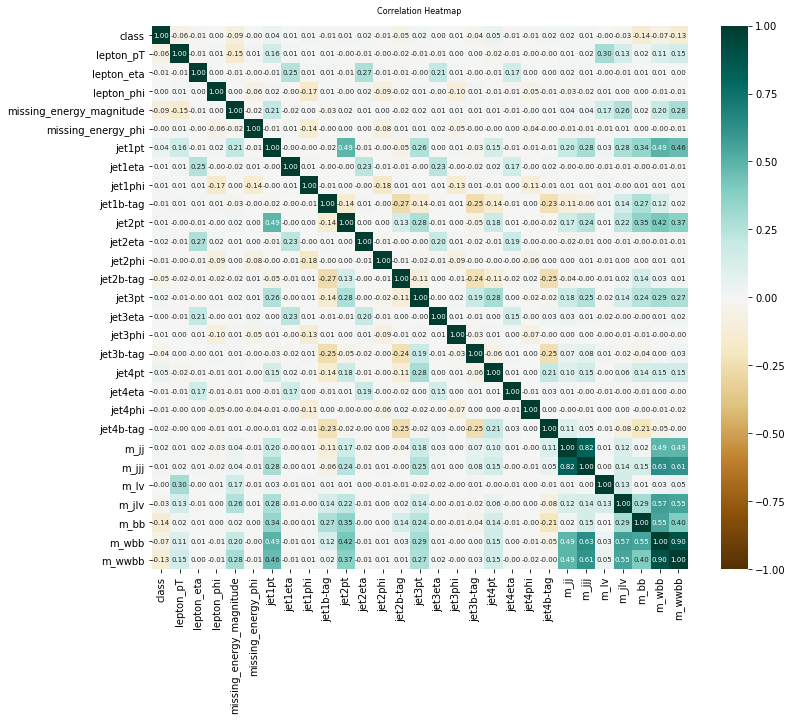

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

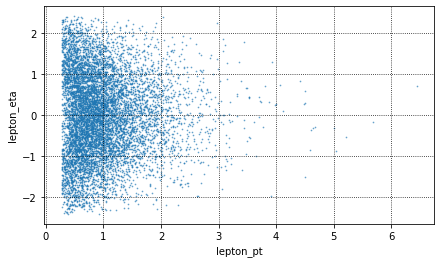

In [21]:
plt.figure(figsize=(7, 4))
plt.scatter(df["lepton_pT"], df["lepton_eta"],s=0.5, alpha=0.6,color="C0")
plt.grid(ls=":", color="k")
plt.xlabel("lepton_pt")
plt.ylabel("lepton_eta")
plt.show()



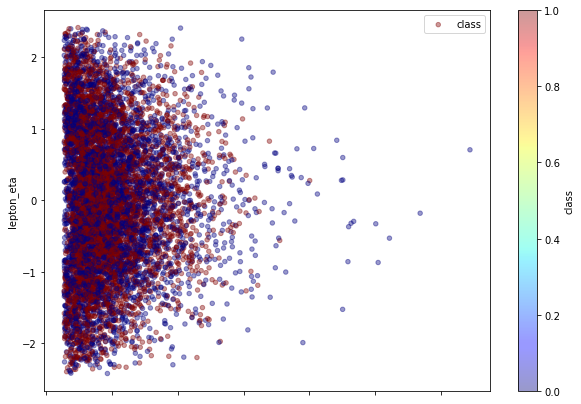

In [22]:
df.plot(kind="scatter", x="lepton_pT", y="lepton_eta", alpha=0.4, label="class", figsize=(10,7),
        c="class", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

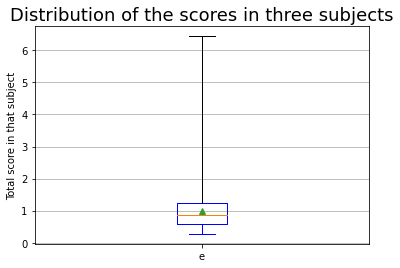

In [23]:
box = plt.boxplot(df["lepton_pT"], showmeans=True, whis=99)
plt.setp(box['boxes'][0], color='blue')
plt.setp(box['caps'][0], color='blue')
plt.setp(box['whiskers'][0], color='blue')
plt.grid(True, axis='y')
plt.title('Distribution of the scores in three subjects', fontsize=18)
plt.ylabel('Total score in that subject')
plt.xticks([1], ['e'])
plt.show()

## Boxplot
---
- Boxplot o diagrama de cajas permite representar los datos numéricos mediante sus cuartiles
- La caja muestra los datos incluides entre el primer cuartil (o percentil 25) y tercer cuartil (o percentil 75)
- La mediana es el percentil 50
- Rango intercuartil: del percentil 25 al percentil 75
- outliers o datos atípicos
- mínimo y máximo

<img src="images/boxplot2.jpg" width=500 />

[Image source](https://builtin.com/data-science/boxplot)

## Histogramas de las variables

/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future ve

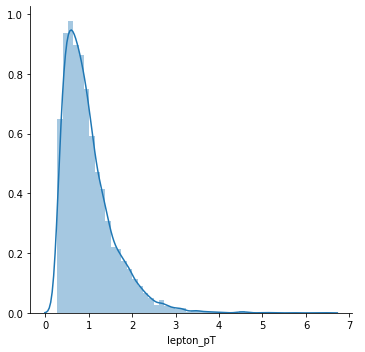

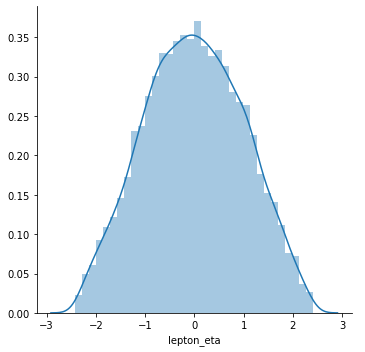

In [24]:
#distribution plot

sns.FacetGrid(df,size=5).map(sns.distplot,"lepton_pT").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"lepton_eta").add_legend()

## Relación entre pares de variables

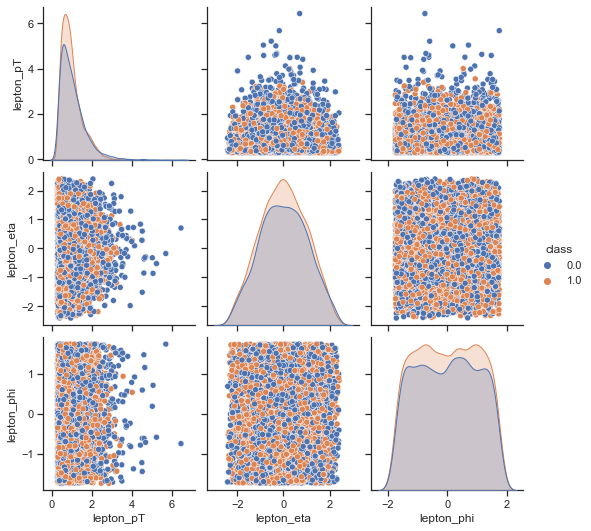

In [25]:
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['lepton_pT','lepton_eta','lepton_phi'], hue="class")
plt.show()

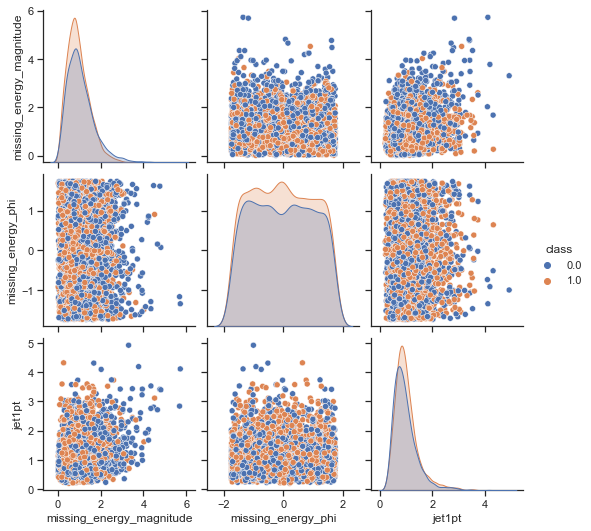

In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['missing_energy_magnitude', 'missing_energy_phi', 'jet1pt'], hue="class")
plt.show()

/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


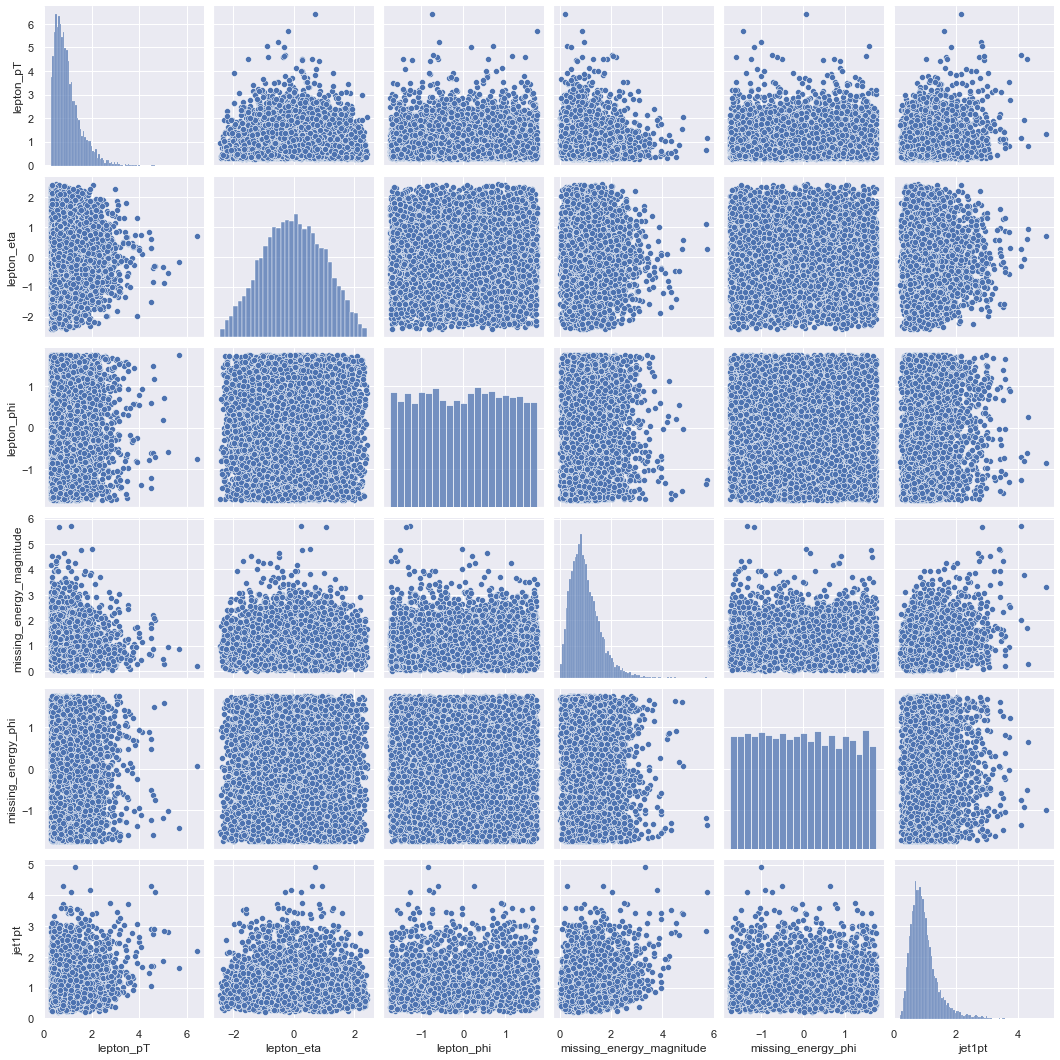

In [27]:
sns.set()
cols = [ 'lepton_pT', 'lepton_eta', 'lepton_phi','missing_energy_magnitude', 'missing_energy_phi', 'jet1pt']
sns.pairplot(df[cols], size = 2.5)
plt.show();